In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

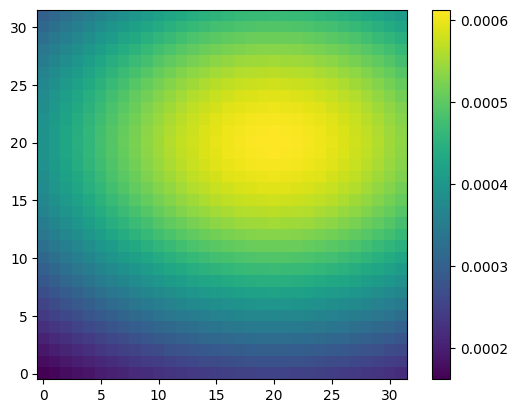

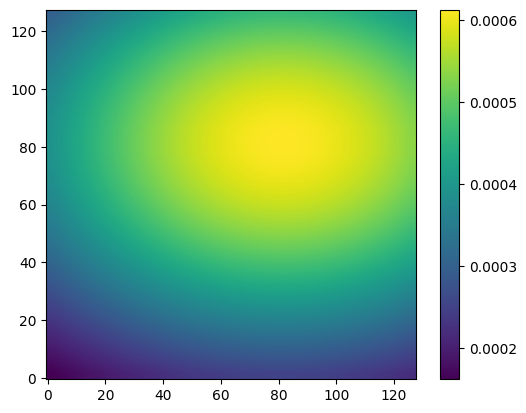

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', origin='lower')
    plt.colorbar()
    plt.show()

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(0, 31, N)
Y = np.linspace(0, 31, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Mean vector and covariance matrix

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
# mu = np.array([20, 50])
# Sigma = np.array([[10, -2], [50,  3]])

mu1 = np.array([20,20])
Sigma1 = 150*np.array([[2, -1], [1, 1]])

mu2 = np.array([5,10])
Sigma2 = 150*np.array([[2, -1], [1, 1]])

Z1 = multivariate_gaussian(pos, mu1, Sigma1)
Z2 = multivariate_gaussian(pos, mu2, Sigma2)

heatmap2d((Z1))
Z1_scaled = (torch.nn.Upsample(size=(128,128), mode='bilinear')(torch.tensor(Z1).unsqueeze(dim=0).unsqueeze(dim=0)).squeeze()).numpy()
heatmap2d(Z1_scaled)

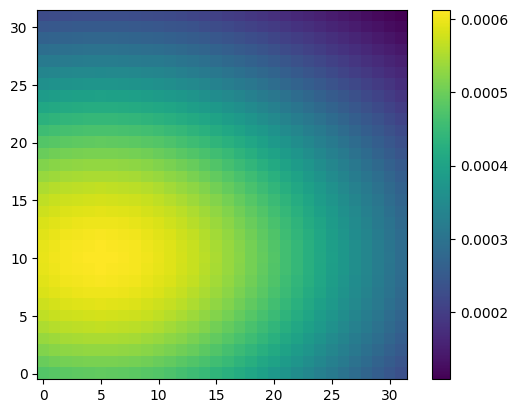

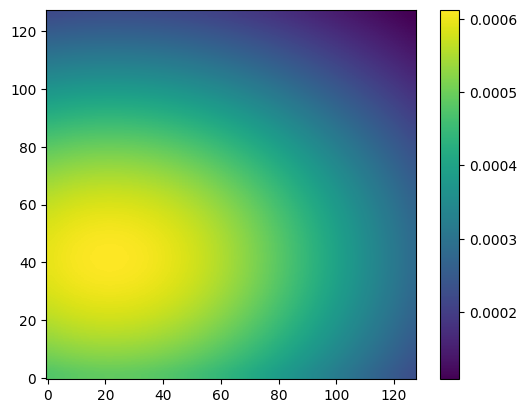

In [163]:
heatmap2d((Z2))

Z2_scaled = (torch.nn.Upsample(size=(128,128), mode='bilinear')(torch.tensor(Z2).unsqueeze(dim=0).unsqueeze(dim=0)).squeeze()).numpy()
heatmap2d(Z2_scaled)


In [164]:
Z1.shape

(32, 32)

In [165]:
Z1_scaled.shape

(128, 128)